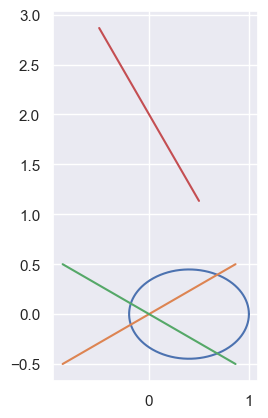

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sympy import sqrt, S, pi, sin, cos
import seaborn as sns


h, k, a, b = 2/5, 0, 3/5, sqrt(5)/5

plt.gca().set_aspect('equal')

t = np.linspace(0, 2 * np.pi, 1000)
plt.plot(h + a * np.cos(t), k + b * np.sin(t))

t = np.linspace(-1, 1, 1000)
plt.plot(t * cos(pi/6), t * sin(pi/6))
plt.plot(t * cos(-pi/6), t * sin(-pi/6))

t = np.linspace(-.5, .5, 1000)
plt.plot(t, -sqrt(3)*t + 2)

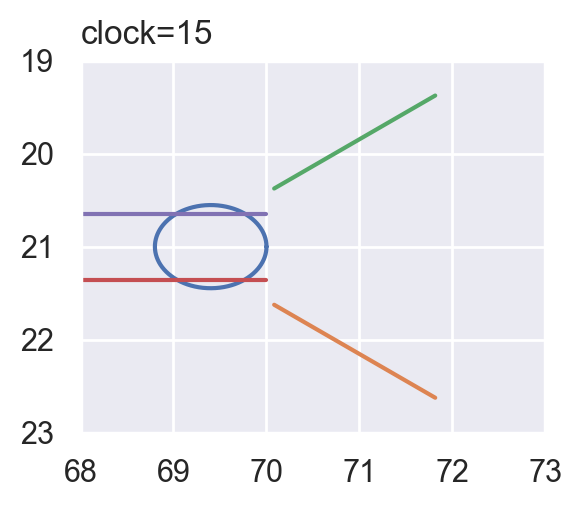

In [29]:
# Plot the ellipse and the lines. Find where the balls move toward each other

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sympy import sqrt, S, pi, sin, cos
import seaborn as sns

ax0, ay0 = 69, 21
bx0, by0 = float(69 + 9*sqrt(3)/8), float(S(177)/8)
cx0, cy0 = float(69 + 9*sqrt(3)/8), float(S(159)/8)

h, k, a, b = 2/5, 0, 3/5, sqrt(5)/5


figsize = (19.2 / 4, 10.8 / 4)
font_scale = 2
sns.set()
figure = Figure(figsize=figsize)
axes = figure.add_subplot()
axes.set_aspect(1)
axes.set_xlim(68, 73)
axes.set_ylim(23, 19)


t = np.linspace(0, 2 * np.pi, 1000)
axes.plot(h + a * np.cos(t) + ax0, k + b * np.sin(t) + ay0)

t = np.linspace(-1, 1, 1000)
axes.plot(t * cos(pi/6) + bx0, t * sin(pi/6) + by0)
axes.plot(t * cos(-pi/6) + cx0, t * sin(-pi/6) + cy0)

t = np.linspace(-1, 1, 10)
#axes.plot(t + ax0, t + ay0)
axes.plot( t+ax0, t*0 + sqrt(2)/4 + ay0)
axes.plot( t+ax0, t*0 - sqrt(2)/4 + ay0)


axes.set_title("clock=15", loc="left")
figure.set_dpi(100 * font_scale)
figure.tight_layout()
new_manager = plt.figure().canvas.manager
new_manager.canvas.figure = figure
figure.set_canvas(new_manager.canvas)
figure.set_dpi(100 * font_scale)
figure.tight_layout()
figure.show()
pass

In [1]:
import sympy as sp
from sympy import symbols, Eq, sqrt, S, pi, sin, cos
from perfect_physics import load

a_vx, a_vy, a_m, ahat_vx, ahat_vy = symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy = symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy = symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")
a_x, a_y, b_x, b_y, c_x, c_y = symbols("a_x, a_y, b_x, b_y, c_x, c_y")

ax0, ay0 = 69, 21
bx0, by0 = 69 + 9*sqrt(3)/8, S(177)/8
cx0, cy0 = 69 + 9*sqrt(3)/8, S(159)/8

point_point_speed_formula = load("instant_speed.sympy")

a_b = {    a_vx: ahat_vx, b_vx: bhat_vx,
           a_vy: ahat_vy, b_vy: bhat_vy,
           a_x: ax0, b_x: bx0,
           a_y: ay0, b_y: by0}


speed_a_b = sp.simplify(point_point_speed_formula.subs(a_b))
a_b_eq = Eq(speed_a_b,0)
a_b_eq

Eq(sqrt(3)*ahat_vx/2 + ahat_vy/2 - sqrt(3)*bhat_vx/2 - bhat_vy/2, 0)

In [2]:
a_c = {    a_vx: ahat_vx, b_vx: chat_vx,
           a_vy: ahat_vy, b_vy: chat_vy,
           a_x: ax0, b_x: cx0,
           a_y: ay0, b_y: cy0}


speed_a_c = sp.simplify(point_point_speed_formula.subs(a_c))
a_c_eq = Eq(speed_a_c,0)
a_c_eq

Eq(sqrt(3)*ahat_vx/2 - ahat_vy/2 - sqrt(3)*chat_vx/2 + chat_vy/2, 0)

In [2]:
sp.solve(a_b_eq, [ahat_vx, bhat_vx, bhat_vy])

[(-sqrt(3)*ahat_vy/3 + bhat_vx + sqrt(3)*bhat_vy/3, bhat_vx, bhat_vy)]

In [3]:
# What's are the constraints on the balls' velocities?

# Find an analytic solution to the problem

from sympy import symbols, Eq, nonlinsolve, sin, cos, pi, S

# conservation of energy
a_m, b_m, c_m = 1, 1, 1
a_vx, b_vx, c_vx = 1, 0, 0
a_vy, b_vy, c_vy = S(0), S(0), S(0)
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5
                        #,Eq(sp.simplify(point_point_speed_formula.subs(a_b)),.5)
                        ], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
print(len(minipool))
minipool0 = minipool.args[0]
minipool0
# for eq in list(minipool_a_b)[0]:
#     print(eq)

2


(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, -sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10)

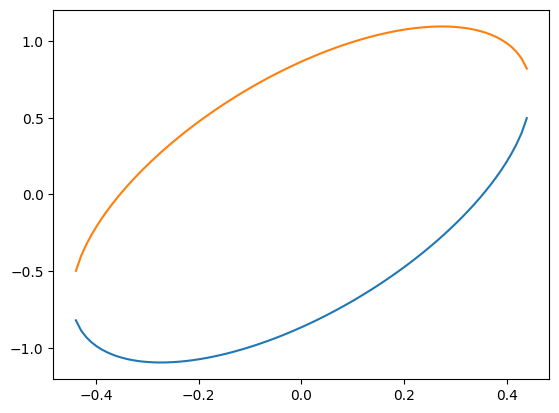

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def speed(ay, index):
    ax, bx, by, cx, cy =  list(minipool)[index].subs(ahat_vy, ay)
    sp = speed_a_b.subs({ahat_vx: ax, ahat_vy: ay, bhat_vx: bx, bhat_vy: by})
    sp = complex(sp)
    if sp.imag == 0:
        return sp.real
    else:
        return np.nan

ay_lin = np.linspace(-.5, .5, 100)
plt.plot(ay_lin, np.vectorize(speed)(ay_lin,0))
plt.plot(ay_lin, np.vectorize(speed)(ay_lin,1))


In [24]:
def speed2(index):
    ax, bx, by, cx, cy =  list(minipool)[index]
    sp = speed_a_b.subs({ahat_vx: ax, bhat_vx: bx, bhat_vy: by})
    return sp
for index in [0,1]:
    print(sp.solve(Eq(speed2(index),0), ahat_vy)[0])


sqrt(2)/4
-sqrt(2)/4


In [4]:
def speed2_a_c(index):
    ax, bx, by, cx, cy =  list(minipool)[index]
    sp = speed_a_c.subs({ahat_vx: ax, chat_vx: cx, chat_vy: cy})
    return sp
for index in [0,1]:
    print(sp.solve(Eq(speed2_a_c(index),0), ahat_vy)[0])

-sqrt(2)/4
sqrt(2)/4


In [8]:
point_point_speed_formula

(-2*a_vx*a_x**3 + 6*a_vx*a_x**2*b_x - 2*a_vx*a_x*a_y**2 + 4*a_vx*a_x*a_y*b_y - 6*a_vx*a_x*b_x**2 - 2*a_vx*a_x*b_y**2 + 2*a_vx*a_y**2*b_x - 4*a_vx*a_y*b_x*b_y + 2*a_vx*b_x**3 + 2*a_vx*b_x*b_y**2 - 2*a_vy*a_x**2*a_y + 2*a_vy*a_x**2*b_y + 4*a_vy*a_x*a_y*b_x - 4*a_vy*a_x*b_x*b_y - 2*a_vy*a_y**3 + 6*a_vy*a_y**2*b_y - 2*a_vy*a_y*b_x**2 - 6*a_vy*a_y*b_y**2 + 2*a_vy*b_x**2*b_y + 2*a_vy*b_y**3 + 2*a_x**3*b_vx + 2*a_x**2*a_y*b_vy - 6*a_x**2*b_vx*b_x - 2*a_x**2*b_vy*b_y + 2*a_x*a_y**2*b_vx - 4*a_x*a_y*b_vx*b_y - 4*a_x*a_y*b_vy*b_x + 6*a_x*b_vx*b_x**2 + 2*a_x*b_vx*b_y**2 + 4*a_x*b_vy*b_x*b_y + 2*a_y**3*b_vy - 2*a_y**2*b_vx*b_x - 6*a_y**2*b_vy*b_y + 4*a_y*b_vx*b_x*b_y + 2*a_y*b_vy*b_x**2 + 6*a_y*b_vy*b_y**2 - 2*b_vx*b_x**3 - 2*b_vx*b_x*b_y**2 - 2*b_vy*b_x**2*b_y - 2*b_vy*b_y**3)/(2*a_x**2*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2) - 4*a_x*b_x*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2) + 2*a_y**2*sqrt(a_x**2 - 2*a_x*b_x + a_y**2 - 2*a_y*b_y + b_x**2 + b_y**2

In [10]:
a_b_eq_2 = a_b_eq.subs(bhat_vx, cos(pi/6)).subs(bhat_vy, sin(pi/6))
a_b_eq_2

Eq(sqrt(3)*ahat_vx/2 + ahat_vy/2 - 1, 0)

In [11]:
a_b_2 = sp.solve(a_b_eq_2, ahat_vy)
print(a_b_2)
list(a_b_2)[0]

[-sqrt(3)*ahat_vx + 2]


-sqrt(3)*ahat_vx + 2